In [2]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

## Define device & hyper parameters

In [3]:
# device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

# define hyper parameters
input_size = 784   # 28 x 28
hidden_size = 100
num_classes = 10   # MNSIT has 10 classes
num_epochs = 2
batch_size = 100
learning_rate = 0.001

cuda


## Load data

In [4]:
# MNIST
train_dataset = torchvision.datasets.MNIST(
    root='./datasets', 
    train=True, 
    transform=transforms.ToTensor(), 
    download=True
)
test_dataset = torchvision.datasets.MNIST(
    root='./datasets', 
    train=False, 
    transform=transforms.ToTensor()
)

train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset, 
    batch_size=batch_size, 
    shuffle=True
)
test_loader = torch.utils.data.DataLoader(
    dataset=test_dataset, 
    batch_size=batch_size, 
    shuffle=False # doesn't matter for test set
)

examples = iter(train_loader)
samples, labels = examples.next()
print(f"samples.shape: {samples.shape}, labels.shape: {labels.shape}")
# 100, 1, 28, 28 / 100

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./datasets/MNIST/raw/train-images-idx3-ubyte.gz to ./datasets/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./datasets/MNIST/raw/train-labels-idx1-ubyte.gz to ./datasets/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./datasets/MNIST/raw/t10k-images-idx3-ubyte.gz to ./datasets/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./datasets/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./datasets/MNIST/raw

samples.shape: torch.Size([100, 1, 28, 28]), labels.shape: torch.Size([100])


## Plotting some samples

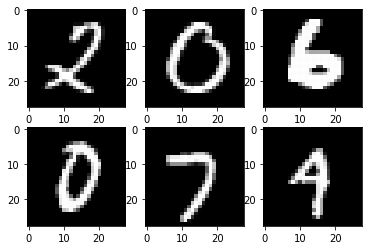

In [5]:
for i in range(6) :
    plt.subplot(2, 3, i+1)
    plt.imshow(samples[i][0], cmap='gray')
plt.show()
    

# Define Model

In [6]:
class NeuralNet(nn.Module) : 
    def __init__(self, input_size, hidden_size, num_classes) :
        super(NeuralNet, self).__init__()  
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(hidden_size, num_classes)
        
    def forward(self, x) :
        out = self.layer1(x)
        out = self.relu(out)
        out = self.layer2(out)
        return out
    
model = NeuralNet(input_size, hidden_size, num_classes).cuda()

# loss and optimizer
criterion = nn.CrossEntropyLoss().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training & Test

In [7]:
# training loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs) :
    # unpack
    for i, (images, labels) in enumerate(train_loader) :
        # 100, 1, 28, 28 -> 100, 784
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        
        # forward
        preds = model(images)
        loss = criterion(preds, labels)
        
        # backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0 :
            print(f"epoch {epoch+1} / {num_epochs}, step {i+1} / {n_total_steps}, loss = {loss.item():.4f}")

epoch 1 / 2, step 100 / 600, loss = 0.4755
epoch 1 / 2, step 200 / 600, loss = 0.4332
epoch 1 / 2, step 300 / 600, loss = 0.2369
epoch 1 / 2, step 400 / 600, loss = 0.2160
epoch 1 / 2, step 500 / 600, loss = 0.3013
epoch 1 / 2, step 600 / 600, loss = 0.2198
epoch 2 / 2, step 100 / 600, loss = 0.1616
epoch 2 / 2, step 200 / 600, loss = 0.2454
epoch 2 / 2, step 300 / 600, loss = 0.3018
epoch 2 / 2, step 400 / 600, loss = 0.1711
epoch 2 / 2, step 500 / 600, loss = 0.1021
epoch 2 / 2, step 600 / 600, loss = 0.2106


In [8]:
# test
with torch.no_grad() : 
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader :
        # 100, 1, 28, 28 -> 100, 784
        images = images.reshape(-1, 28*28).to(device) 
        labels = labels.to(device)
        preds = model(images)
        
        # value, index
        _, preds = torch.max(preds, 1)
        n_samples += labels.shape[0]
        n_correct += (preds == labels).sum().item()
        
    acc = 100.0 * (n_correct / n_samples)
    print(f"accuracy = {acc}")
        

accuracy = 95.33
